In [1]:
!pip install matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import os

In [3]:
dir="./UTKFace"

files=os.listdir(dir)

In [6]:
!pip install opencv-python

     -------------------------------------- 39.5/39.5 MB 467.3 kB/s eta 0:00:00


In [8]:
import cv2 as cv
ages=[]
genders=[]
images=[]

for fil in files:
    age=int(fil.split('_')[0])
    gender=int(fil.split('_')[1])
    ages.append(age)
    genders.append(gender)
    total=dir+'/'+fil
    image=cv.imread(total)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

    image=cv.resize(image,(48,48))
    images.append(image)

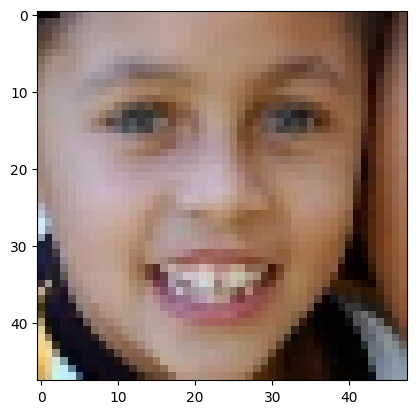

In [9]:
plt.imshow(images[100])

In [10]:
print(ages[100])

10


In [11]:
print(genders[100])

0


Age:40
Gender: Male


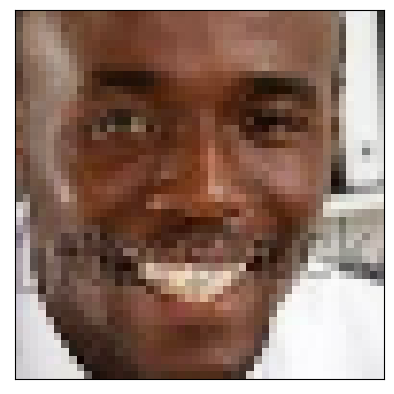

Age:5
Gender: Female


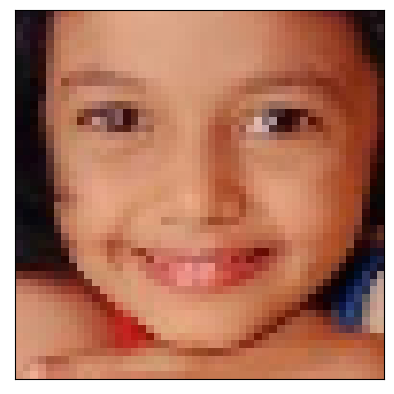

Age:8
Gender: Female


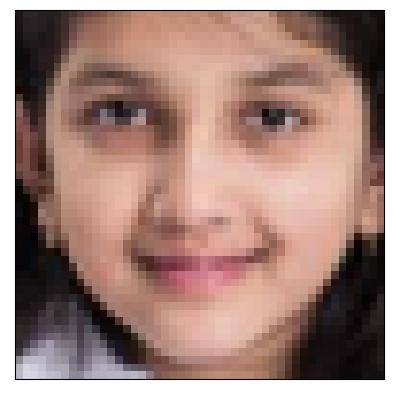

Age:53
Gender: Male


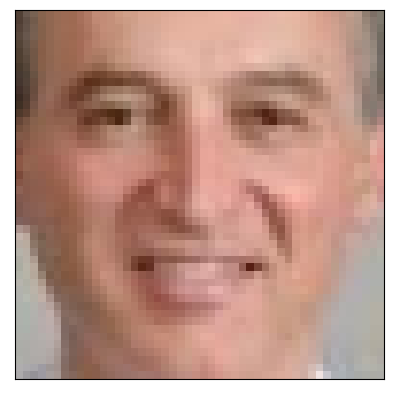

Age:84
Gender: Female


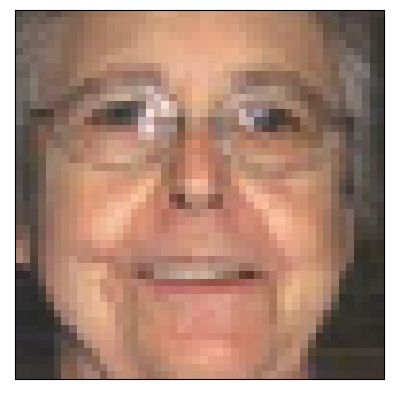

In [12]:
def showdemo(n):
    for i in np.random.randint(0,len(images),n):
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        print(f"Age:{ages[i]}")
        v=genders[i]
        if(v==1):
            print("Gender: Female")
        else: 
            print("Gender: Male")


        plt.show()  

showdemo(5)

In [13]:
images_arr=np.array(images)

ages_arr=np.array(ages)

gender_arr=np.array(genders)

In [14]:
np.save(dir+'images.npy',images_arr)
np.save(dir+'ages.npy',ages_arr)

np.save(dir+'genders.npy',gender_arr)

In [15]:
values,counts=np.unique(gender_arr,return_counts=True)

In [16]:
counts

array([12389, 11312], dtype=int64)

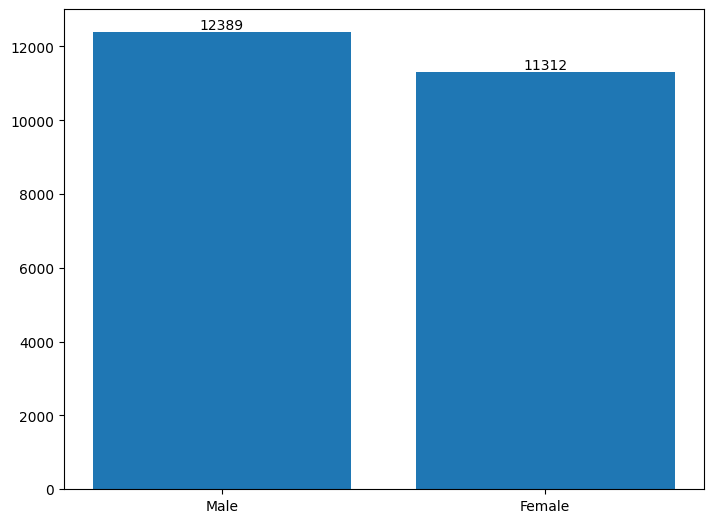

In [17]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
value=counts
ax.bar(gender,value)
for i in range(len(gender)):
    ax.text(i,value[i]+1,str(value[i]),ha='center',va='bottom')
plt.show()

In [18]:
values,counts=np.unique(ages_arr,return_counts=True)
print(values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [19]:
val=values.tolist()
count=counts.tolist()

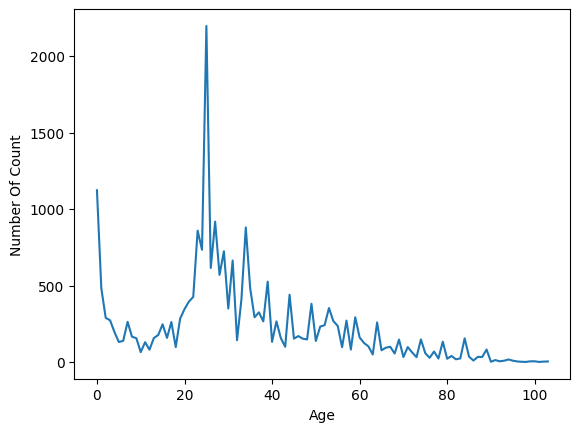

In [20]:
plt.plot(count)
plt.xlabel("Age")
plt.ylabel("Number Of Count")
plt.show()

In [21]:
images_arr1=images_arr/255.0

In [22]:
labels=[]
i=0

while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)

    i=i+1

In [23]:
labels_arr=np.array(labels)

In [25]:
!pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(images_arr1,labels_arr,test_size=0.25)

In [27]:
Y_train[0:5]

array([[95,  1],
       [ 4,  1],
       [48,  1],
       [ 8,  1],
       [28,  1]])

In [28]:
Y_train2=(Y_train[:,1],Y_train[:,0])
Y_test2=(Y_test[:,1],Y_test[:,0])

In [29]:
print(Y_train2[0][0:5])
print(Y_train2[1][0:5])

[1 1 1 1 1]
[95  4 48  8 28]


## Defining The Model

In [30]:
def Conventional(input_tensor,filters):
    x=Conv2D(filters=filters,padding="same",kernel_size=(3,3),strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [31]:
def models(input_shape):
    input = Input(shape=input_shape)
    
    conv_1 = Conventional(input, 32)
    max_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    
    conv_2 = Conventional(max_1, 64)
    max_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
    
    conv_3 = Conventional(max_2, 128)
    max_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
    
    conv_4 = Conventional(max_3, 264)
    max_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
    
    flatten = Flatten()(max_4)
    
  
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    
    dropout_1 = Dropout(0.2)(dense_1)
    dropout_2 = Dropout(0.2)(dense_2)
    
   
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(dropout_1)  
    output_2 = Dense(1, activation='linear', name='age_out')(dropout_2)  
    
    
    model = Model(inputs=input, outputs=[output_1, output_2])
    
    
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    
    return model

In [32]:
model_instance=models((48,48,3))

In [26]:
model_instance.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
_______________________________________________________________________________________

## Initialization The Model

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint
flir='Age_Sex_detection.h5'
checkpoint=ModelCheckpoint(flir,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=15,verbose=1,restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running The Model

In [36]:
History=model_instance.fit(X_train,Y_train2,batch_size=64,validation_data=(X_test,Y_test2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 15.6730 - sex_out_loss: 0.6780 - age_out_loss: 14.8289 - sex_out_accuracy: 0.5641 - age_out_accuracy: 0.0468
Epoch 1: val_loss improved from inf to 17.13781, saving model to Age_Sex_detection.h5
278/278 [==============================] - 54s 193ms/step - loss: 15.6730 - sex_out_loss: 0.6780 - age_out_loss: 14.8289 - sex_out_accuracy: 0.5641 - age_out_accuracy: 0.0468 - val_loss: 17.1378 - val_sex_out_loss: 0.6413 - val_age_out_loss: 16.3195 - val_sex_out_accuracy: 0.6612 - val_age_out_accuracy: 0.0493
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 12.7837 - sex_out_loss: 0.5927 - age_out_loss: 11.9740 - sex_out_accuracy: 0.6849 - age_out_accuracy: 0.0450
Epoch 2: val_loss improved from 17.13781 to 11.62689, saving model to Age_Sex_detection.h5
278/278 [==============================] - 50s 180ms/step - loss: 12.7837 - sex_out_loss: 0.5927 - age_out_loss: 11.9740 - sex_out_accuracy: 0.6849 - a

In [37]:
model_instance.evaluate(X_test,Y_test2)

186/186 [==============================] - 3s 18ms/step - loss: 7.6521 - sex_out_loss: 0.2587 - age_out_loss: 6.5842 - sex_out_accuracy: 0.8863 - age_out_accuracy: 0.0493


[7.652117729187012,
 0.25874388217926025,
 6.584223747253418,
 0.886263906955719,
 0.04927438497543335]

In [38]:
pred=model_instance.predict(X_test)

186/186 [==============================] - 4s 18ms/step


In [39]:
pred[1]

array([[29.111137],
       [30.634403],
       [49.16899 ],
       ...,
       [41.48122 ],
       [28.314888],
       [40.87767 ]], dtype=float32)

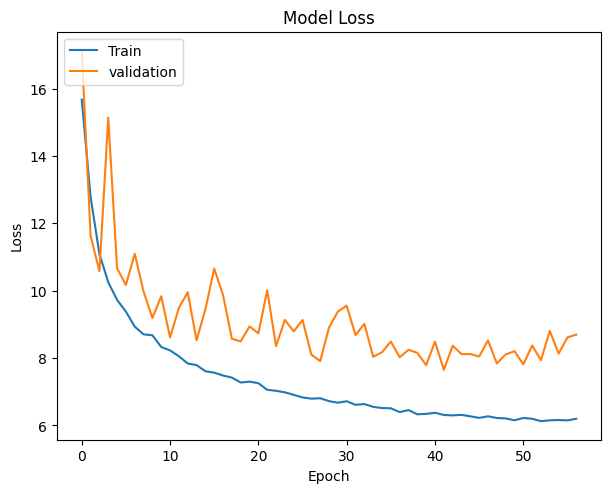

In [40]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

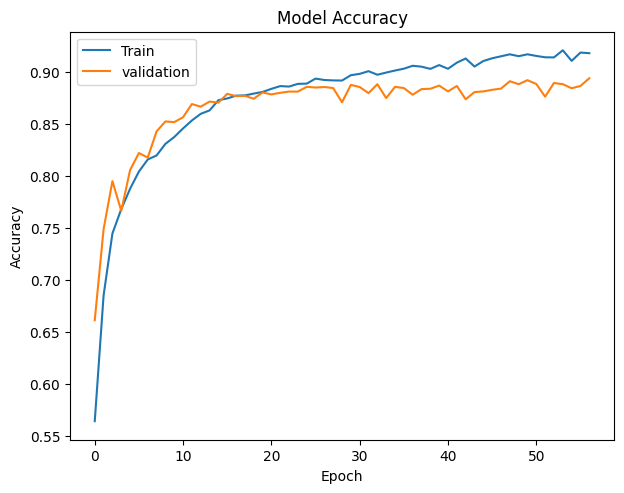

In [41]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

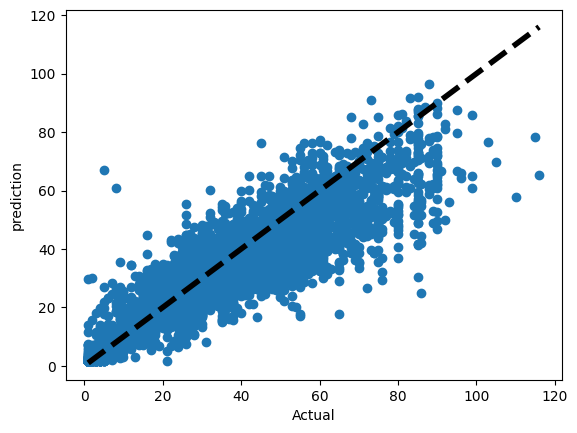

In [42]:
fig,ax=plt.subplots()
ax.scatter(Y_test2[1],pred[1])
ax.plot([Y_test2[1].min(),Y_test2[1].max()],[Y_test2[1].min(),Y_test2[1].max()],'k--',lw=4)

plt.xlabel("Actual")
plt.ylabel("prediction")
plt.show()

In [43]:
i=0
pred_l=[]
while i<len(pred[0]):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

report=classification_report(Y_test2[0],pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3106
           1       0.85      0.93      0.89      2820

    accuracy                           0.89      5926
   macro avg       0.89      0.89      0.89      5926
weighted avg       0.89      0.89      0.89      5926



In [47]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 221.0 kB/s eta 0:00:00


<AxesSubplot:>

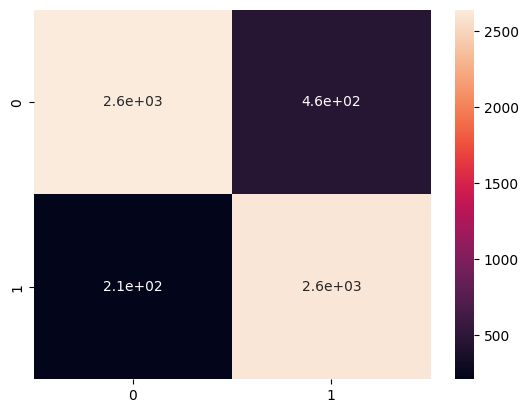

In [48]:
result=confusion_matrix(Y_test2[0],pred_l)  
import seaborn as sns
sns.heatmap(result,annot=True)

## Tesing The Model

In [49]:
def testing(index,images_arr,images_arr1,model_instance):
    plt.imshow(images_arr[index])
    image_test=images_arr1[index]
    pre=model_instance.predict(np.array([image_test]))
    gender=['Male','Female']
    age=int(np.round(pre[1][0]))
    sex=int(np.round(pre[0][0]))
    print("Predict Age "+ str(age))
    print("Predict Gender "+ gender[sex])

1/1 [==============================] - 0s 30ms/step
Predict Age 7
Predict Gender Female


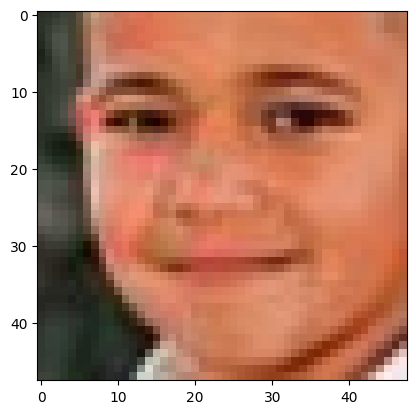

In [50]:
testing(83,images_arr,images_arr1,model_instance)